In [30]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\Desktop\Codes\ISRO\data_2016_new_all.csv")

In [31]:
df.shape

(263520, 18)

In [32]:
df.head(15)

,Unnamed: 0,valid_time,latitude,longitude,model_level,tp,number,expver,u10,v10,d2m,t2m,pm2p5,pm10,co,no2,go3,so2
0,0,2016-01-01 00:00:00,28.43,77.34,60.0,0.0,0,1,1.428218,-1.449358,282.02660,282.80515,5.935148e-07,8.417549e-07,0.000005,6.493097e-08,9.999998e-15,1.403333e-07
1,1,2016-01-01 00:00:00,28.43,77.59,60.0,0.0,0,1,1.311274,-1.540422,282.14282,282.72702,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016-01-01 00:00:00,28.43,77.84,60.0,0.0,0,1,1.168208,-1.570330,281.91920,282.37740,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016-01-01 00:00:00,28.43,78.09,60.0,0.0,0,1,1.158687,-1.563128,281.80690,282.26608,4.571463e-07,6.475787e-07,0.000004,4.045744e-08,9.999998e-15,7.346028e-08
4,4,2016-01-01 00:00:00,28.43,78.34,60.0,0.0,0,1,0.998775,-1.604509,281.77173,282.29733,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2016-01-01 00:00:00,28.43,78.59,60.0,0.0,0,1,0.808101,-1.708880,281.64087,282.23288,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2016-01-01 00:00:00,28.43,78.84,60.0,0.0,0,1,0.537959,-1.786516,281.52954,282.19870,3.997674e-07,5.656652e-07,0.000004,3.754853e-08,1.094760e-13,4.999945e-08
7,7,2016-01-01 00:00:00,28.43,79.09,60.0,0.0,0,1,0.159053,-1.875383,281.39380,281.94577,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2016-01-01 00:00:00,28.43,79.34,60.0,0.0,0,1,-0.242925,-1.780901,281.71313,282.47507,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2016-01-01 00:00:00,28.43,79.59,60.0,0.0,0,1,-0.784673,-1.435320,281.80493,282.39890,3.240704e-07,4.585620e-07,0.000003,3.469432e-08,6.473334e-11,3.747875e-08


In [33]:
df = df.dropna()

In [34]:
import numpy as np

df['temp_C'] = df['t2m'] - 273.15
df['dew_C'] = df['d2m'] - 273.15

e_t = 6.112 * np.exp((17.67 * df['temp_C']) / (df['temp_C'] + 243.5))
e_d = 6.112 * np.exp((17.67 * df['dew_C']) / (df['dew_C'] + 243.5))

df['humidity'] = 100 * (e_d / e_t)

df['temp'] = df['t2m'] - 273.15

df['wind_speed'] = np.sqrt(df['u10']**2 + df['v10']**2)

df['rainfall'] = df['tp'] * 1000   

In [35]:
df['valid_time'] = pd.to_datetime(df['valid_time'])
df['day'] = df['valid_time'].dt.day
df['month'] = df['valid_time'].dt.month

In [36]:
X = df[['month','day','temp', 'humidity', 'wind_speed', 'rainfall']]

In [37]:
import math
import pandas as pd

class FWICLASS:
    def __init__(self, temp, rhum, wind, prcp):
        self.t = temp   # °C
        self.h = rhum   # %
        self.w = wind   # km/h
        self.p = prcp   #mm

    #FFMC
    def FFMCcalc(self, ffmc0):
        mo = (147.2 * (101.0 - ffmc0)) / (59.5 + ffmc0)

        if self.p > 0.5:
            rf = self.p - 0.5
            if mo > 150.0:
                mo = (mo + 42.5 * rf * math.exp(-100.0 / (251.0 - mo)) *
                      (1.0 - math.exp(-6.93 / rf))) + \
                     (0.0015 * (mo - 150.0) ** 2) * math.sqrt(rf)
            else:
                mo = mo + 42.5 * rf * math.exp(-100.0 / (251.0 - mo)) * \
                     (1.0 - math.exp(-6.93 / rf))
            if mo > 250.0:
                mo = 250.0

        ed = 0.942 * (self.h ** 0.679) + \
             (11.0 * math.exp((self.h - 100.0) / 10.0)) + \
             0.18 * (21.1 - self.t) * (1.0 - 1.0 / math.exp(0.1150 * self.h))

        if mo < ed:
            ew = 0.618 * (self.h ** 0.753) + \
                 (10.0 * math.exp((self.h - 100.0) / 10.0)) + \
                 0.18 * (21.1 - self.t) * (1.0 - 1.0 / math.exp(0.115 * self.h))
            if mo <= ew:
                kl = 0.424 * (1.0 - ((100.0 - self.h) / 100.0) ** 1.7) + \
                     (0.0694 * math.sqrt(self.w)) * (1.0 - ((100.0 - self.h) / 100.0) ** 8)
                kw = kl * (0.581 * math.exp(0.0365 * self.t))
                m = ew - (ew - mo) / 10.0 ** kw
            else:
                m = mo
        elif mo == ed:
            m = mo
        else:  # mo > ed
            kl = 0.424 * (1.0 - (self.h / 100.0) ** 1.7) + \
                 (0.0694 * math.sqrt(self.w)) * (1.0 - (self.h / 100.0) ** 8)
            kw = kl * (0.581 * math.exp(0.0365 * self.t))
            m = ed + (mo - ed) / 10.0 ** kw

        ffmc = (59.5 * (250.0 - m)) / (147.2 + m)
        ffmc = min(max(ffmc, 0.0), 101.0)
        return ffmc

    #DMC
    def DMCcalc(self, dmc0, mth):
        el = [6.5, 7.5, 9.0, 12.8, 13.9, 13.9,
            12.4, 10.9, 9.4, 8.0, 7.0, 6.0]
        t = max(self.t, -1.1)
        rk = 1.894 * (t + 1.1) * (100.0 - self.h) * (el[mth - 1] * 0.0001)

        if self.p > 1.5:
            ra = self.p
            rw = 0.92 * ra - 1.27
            safe_dmc0 = max(dmc0, 0.0)  
            exp_arg = min(700, 0.023 * safe_dmc0)
            wmi = 20.0 + 280.0 / math.exp(exp_arg)

            if dmc0 <= 33.0:
                b = 100.0 / (0.5 + 0.3 * dmc0)
            elif dmc0 <= 65.0:
                b = 14.0 - 1.3 * math.log(dmc0)
            else:
                b = 6.2 * math.log(dmc0) - 17.2

            wmr = wmi + (1000 * rw) / (48.77 + b * rw)
            pr = 43.43 * (5.6348 - math.log(max(wmr - 20.0, 1e-6)))  # avoid log(0)
        else:
            pr = dmc0

        dmc = max(pr + rk, 1.0)
        return dmc


    #DC
    def DCcalc(self, dc0, mth):
        fl = [-1.6, -1.6, -1.6, 0.9, 3.8, 5.8,
              6.4, 5.0, 2.4, 0.4, -1.6, -1.6]
        t = max(self.t, -2.8)
        pe = max((0.36 * (t + 2.8) + fl[mth - 1]) / 2, 0.0)

        if self.p > 2.8:
            ra = self.p
            rw = 0.83 * ra - 1.27
            smi = 800.0 * math.exp(-dc0 / 400.0)
            dr = dc0 - 400.0 * math.log(1.0 + ((3.937 * rw) / smi))
            dc = dr + pe if dr > 0 else dc0 + pe
        else:
            dc = dc0 + pe
        return dc

    #ISI
    def ISIcalc(self, ffmc):
        mo = 147.2 * (101.0 - ffmc) / (59.5 + ffmc)
        ff = 19.115 * math.exp(mo * -0.1386) * (1.0 + (mo ** 5.31) / 49300000.0)
        isi = ff * math.exp(0.05039 * self.w)
        return isi

    #BUI
    def BUIcalc(self, dmc, dc):
        if dmc <= 0.4 * dc:
            bui = (0.8 * dc * dmc) / (dmc + 0.4 * dc)
        else:
            bui = dmc - (1.0 - 0.8 * dc / (dmc + 0.4 * dc)) * \
                  (0.92 + (0.0114 * dmc) ** 1.7)
        return max(bui, 0.0)

    #FWI
    def FWIcalc(self, isi, bui):
        if bui <= 80.0:
            bb = 0.1 * isi * (0.626 * bui ** 0.809 + 2.0)
        else:
            exp_arg = min(700, 0.023 * bui)  # avoid overflow
            bb = 0.1 * isi * (1000.0 / (25.0 + 108.64 / math.exp(exp_arg)))

        if bb <= 1.0:
            fwi = bb
        else:
            fwi = math.exp(2.72 * (0.434 * math.log(bb)) ** 0.647)
        return fwi



def calculate_fwi_df(df):
    ffmc0, dmc0, dc0 = 85.0, 6.0, 15.0

    FFMC_list, DMC_list, DC_list, ISI_list, BUI_list, FWI_list = [], [], [], [], [], []

    for idx, row in df.iterrows():
        temp = row['temp']
        rhum = min(row['humidity'], 100.0)
        wind = row['wind_speed']
        prcp = row['rainfall']
        mth = int(row['month'])

        fwisystem = FWICLASS(temp, rhum, wind, prcp)

        ffmc = fwisystem.FFMCcalc(ffmc0)
        dmc = fwisystem.DMCcalc(dmc0, mth)
        dc = fwisystem.DCcalc(dc0, mth)
        isi = fwisystem.ISIcalc(ffmc)
        bui = fwisystem.BUIcalc(dmc, dc)
        fwi = fwisystem.FWIcalc(isi, bui)

        ffmc0, dmc0, dc0 = ffmc, dmc, dc

        FFMC_list.append(ffmc)
        DMC_list.append(dmc)
        DC_list.append(dc)
        ISI_list.append(isi)
        BUI_list.append(bui)
        FWI_list.append(fwi)

    df['FFMC'] = FFMC_list
    df['DMC'] = DMC_list
    df['DC'] = DC_list
    df['ISI'] = ISI_list
    df['BUI'] = BUI_list
    df['FWI'] = FWI_list

    return df


In [38]:
X = df[['month','day','temp','humidity','wind_speed','rainfall']]
X = calculate_fwi_df(X)

C:\Users\Admin\AppData\Local\Temp\ipykernel_432\2186996121.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FFMC'] = FFMC_list
C:\Users\Admin\AppData\Local\Temp\ipykernel_432\2186996121.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DMC'] = DMC_list
C:\Users\Admin\AppData\Local\Temp\ipykernel_432\2186996121.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [39]:
df['FWI'] = X['FWI']
df['FFMC'] = X['FFMC']
df['DMC'] = X['DMC']
df['DC'] = X['DC']
df['ISI'] = X['ISI']
df['BUI'] = X['BUI']
df['FWI'] = X['FWI']

In [40]:
df.columns

Index(['Unnamed: 0', 'valid_time', 'latitude', 'longitude', 'model_level',
       'tp', 'number', 'expver', 'u10', 'v10', 'd2m', 't2m', 'pm2p5', 'pm10',
       'co', 'no2', 'go3', 'so2', 'temp_C', 'dew_C', 'humidity', 'temp',
       'wind_speed', 'rainfall', 'day', 'month', 'FWI', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI'],
      dtype='object')

In [41]:
df['FWI'].max()

np.float64(56.245030280215644)

In [42]:
df.loc[df['pm2p5'] == df['pm2p5'].max()] 

,Unnamed: 0,valid_time,latitude,longitude,model_level,tp,number,expver,u10,v10,...,wind_speed,rainfall,day,month,FWI,FFMC,DMC,DC,ISI,BUI
85053,85053,2016-04-28,29.93,78.09,60.0,0.0,0,1,-1.201183,-1.716228,...,2.094822,0.0,28,4,21.24764,88.686077,3367.07545,16334.722396,3.945903,4444.031147


In [43]:
df.loc[df['FWI'] == df['FWI'].max()] 

,Unnamed: 0,valid_time,latitude,longitude,model_level,tp,number,expver,u10,v10,...,wind_speed,rainfall,day,month,FWI,FFMC,DMC,DC,ISI,BUI
99090,99090,2016-05-17 12:00:00,29.93,77.34,60.0,0.0,0,1,4.202764,-2.79325,...,5.046332,0.0,17,5,56.24503,98.209876,1758.678954,26506.445436,17.181285,3016.931191


In [44]:
df.loc[(df['month'] == 5)& (df['day']== 2)].max()

Unnamed: 0                   88527
valid_time     2016-05-02 18:00:00
latitude                     30.68
longitude                    80.34
model_level                   60.0
tp                        0.000051
number                           0
expver                           1
u10                       3.755345
v10                       4.058943
d2m                      296.49023
t2m                      315.09546
pm2p5                          0.0
pm10                      0.000001
co                        0.000004
no2                            0.0
go3                            0.0
so2                            0.0
temp_C                    41.94546
dew_C                     23.34023
humidity                 97.974609
temp                      41.94546
wind_speed                4.870837
rainfall                  0.051439
day                              2
month                            5
FWI                      47.981368
FFMC                     96.809835
DMC                 

In [45]:
df['pm2p5'] = df['pm2p5'] * 1e9

<Axes: xlabel='FWI', ylabel='pm2p5'>

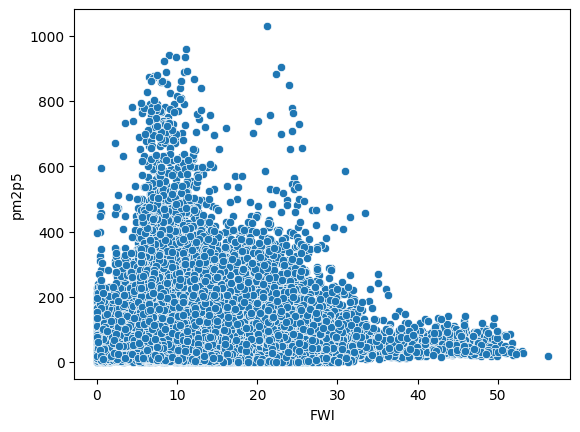

In [46]:
import seaborn as sns
sns.scatterplot(x=df['FWI'],y=df['pm2p5'])

In [47]:
Xq = df[['co','go3','no2','pm10','pm2p5','so2']]

In [ ]:
import pandas as pd
import numpy as np


breakpoints = {
    "pm2p5": [
        (0, 30, 0, 50),
        (31, 60, 51, 100),
        (61, 90, 101, 200),
        (91, 120, 201, 300),
        (121, 250, 301, 400),
        (251, 500, 401, 500)
    ],
    "pm10": [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 250, 101, 200),
        (251, 350, 201, 300),
        (351, 430, 301, 400),
        (431, 500, 401, 500)
    ],
    "no2": [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 180, 101, 200),
        (181, 280, 201, 300),
        (281, 400, 301, 400),
        (401, 500, 401, 500)
    ],
    "so2": [
        (0, 40, 0, 50),
        (41, 80, 51, 100),
        (81, 380, 101, 200),
        (381, 800, 201, 300),
        (801, 1600, 301, 400),
        (1601, 2000, 401, 500)
    ],
    "co": [
        (0, 1, 0, 50),
        (1.1, 2, 51, 100),
        (2.1, 10, 101, 200),
        (10.1, 17, 201, 300),
        (17.1, 34, 301, 400),
        (34.1, 50, 401, 500)
    ],
    "go3": [
        (0, 50, 0, 50),
        (51, 100, 51, 100),
        (101, 168, 101, 200),
        (169, 208, 201, 300),
        (209, 748, 301, 400),
        (749, 1000, 401, 500)
    ]
}


def calc_pollutant_aqi(cp, pollutant):
    """Calculate AQI for a single pollutant concentration."""
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints[pollutant]:
        if bp_lo <= cp <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (cp - bp_lo) + i_lo
    return np.nan  

def calculate_aqi(df):
    """Calculate AQI for dataframe with CPCB pollutants."""
    aqi_values = []

    for _, row in df.iterrows():
        sub_indices = []
        for pollutant in breakpoints.keys():
            if pollutant in row and not pd.isna(row[pollutant]):
                sub_indices.append(calc_pollutant_aqi(row[pollutant], pollutant))
        if sub_indices:
            aqi_values.append(max(sub_indices)) 
        else:
            aqi_values.append(np.nan)

    df["AQI"] = aqi_values
    return df


In [49]:
Xq = df[['co','go3','no2','pm10','pm2p5','so2']]
q = calculate_aqi(Xq)
print(Xq.head())


          co           go3           no2          pm10      pm2p5  \
0   0.000005  9.999998e-15  6.493097e-08  8.417549e-07  593.51476   
3   0.000004  9.999998e-15  4.045744e-08  6.475787e-07  457.14634   
6   0.000004  1.094760e-13  3.754853e-08  5.656652e-07  399.76740   
9   0.000003  6.473334e-11  3.469432e-08  4.585620e-07  324.07038   
12  0.000003  5.058311e-10  2.466729e-08  2.791244e-07  197.26784   

             so2         AQI  
0   1.403333e-07         NaN  
3   7.346028e-08  482.961798  
6   4.999945e-08  460.148484  
9   3.747875e-08  430.052079  
12  1.871735e-08  359.531133  


C:\Users\Admin\AppData\Local\Temp\ipykernel_432\3180581762.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AQI"] = aqi_values


In [50]:
df['AQI'] = q['AQI']

<Axes: xlabel='FWI', ylabel='pm2p5'>

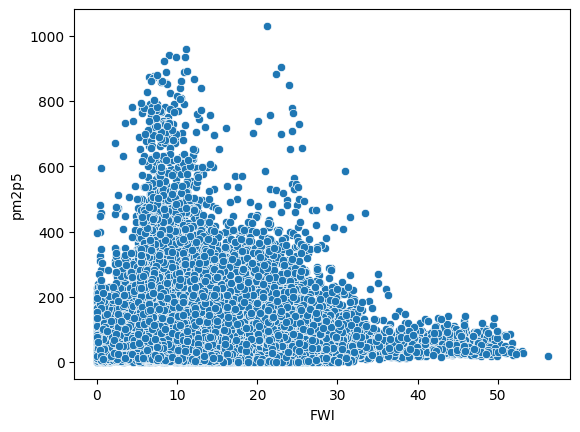

In [51]:
sns.scatterplot(x=df['FWI'],y=df['pm2p5'])

<Axes: xlabel='FWI', ylabel='AQI'>

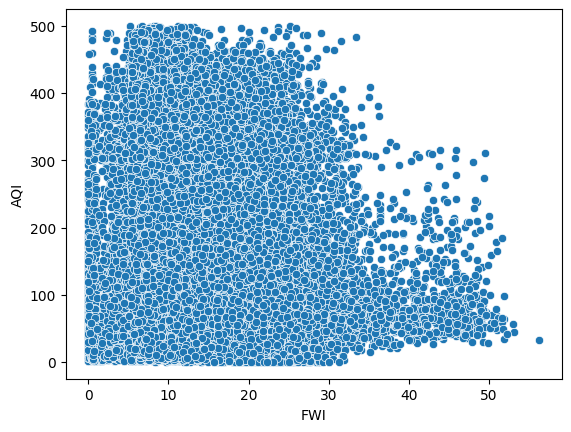

In [52]:
sns.scatterplot(x=df['FWI'],y=df['AQI'])

In [53]:
df.loc[df['pm2p5'] == df['pm2p5'].max()] 

,Unnamed: 0,valid_time,latitude,longitude,model_level,tp,number,expver,u10,v10,...,rainfall,day,month,FWI,FFMC,DMC,DC,ISI,BUI,AQI
85053,85053,2016-04-28,29.93,78.09,60.0,0.0,0,1,-1.201183,-1.716228,...,0.0,28,4,21.24764,88.686077,3367.07545,16334.722396,3.945903,4444.031147,NaN


In [54]:
df.to_csv('data_with_fwi_and_aqi.csv')